<IPython.core.display.Javascript object>


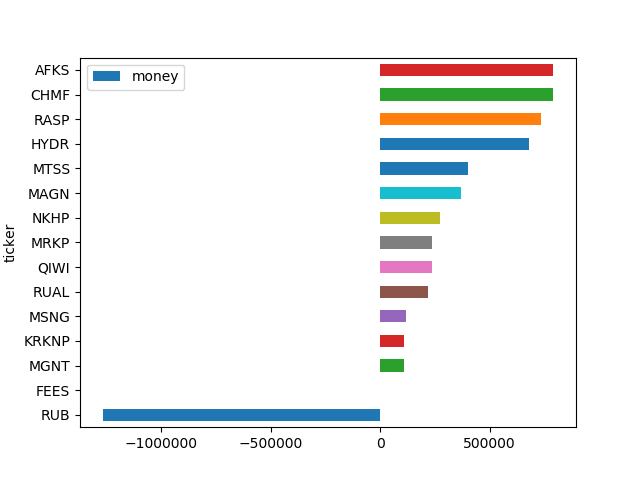

In [38]:
import importlib
import pandas as pd
import requests
from lxml import etree
import sys

import utils

%matplotlib notebook
import matplotlib.pyplot as plt

importlib.reload(utils)


df=utils.getPortfolio(utils.ivanTabs,'position.db')    
df.plot(x='ticker', y='money', kind='barh')


In [35]:
capital=df.money.sum()
df

,ticker,position,target,horizon,price,vola,annual_upside,wght,money
14,RUB,-1266262.32,1.0,10,1.0000,0.000000,1.000000,-0.333609,-1266262.32
2,FEES,0.00,0.2,1,0.1734,0.198645,1.153403,0.000000,0.00
6,MGNT,25.00,6000.0,1,4342.0000,0.288575,1.381852,0.028599,108550.00
4,KRKNP,10.00,15000.0,3,10940.0000,0.118797,1.110942,0.028822,109400.00
8,MSNG,50000.00,3.0,3,2.3820,0.215025,1.079924,0.031378,119100.00
13,RUAL,9000.00,40.0,2,24.1000,0.540116,1.288313,0.057144,216900.00
11,QIWI,231.00,1500.0,3,1015.0000,0.292903,1.139047,0.061772,234465.00
7,MRKP,800000.00,0.5,3,0.2955,0.247985,1.191619,0.062282,236400.00
10,NKHP,1290.00,250.0,2,211.5000,0.145588,1.087213,0.071881,272835.00
5,MAGN,8500.00,55.0,2,43.2250,0.202282,1.128012,0.096798,367412.50


In [39]:
targets = utils.getAnnualized()
ups = targets.annual_upside - 1
targets['ups']=ups/ups.sum()
targets.round(pd.Series([3, 3, 3,3],index=['ups','vola','annual_upside','wght'])).sort_values(by='ups', ascending=True)

,ticker,target,horizon,price,vola,annual_upside,ups
21,TATN,600.000,1,704.9500,0.239,0.851,-0.039
19,RUB,1.000,10,1.0000,0.000,1.000,0.000
20,AFLT,140.000,2,121.0000,0.252,1.076,0.020
16,MSNG,3.000,3,2.3820,0.215,1.080,0.021
7,NKHP,250.000,2,211.5000,0.146,1.087,0.023
17,CHMF,1200.000,2,984.0000,0.185,1.104,0.027
11,KRKNP,15000.000,3,10940.0000,0.119,1.111,0.029
1,MAGN,55.000,2,43.2250,0.202,1.128,0.033
9,QIWI,1500.000,3,1015.0000,0.293,1.139,0.036
15,FEES,0.200,1,0.1734,0.199,1.153,0.040


In [37]:
targets.sort_values(by='tw',ascending=True).plot(x='ticker', y='tw', kind='barh')

KeyError: 'tw'